In [1]:
# -----------------------------------------------------------------------
# author: Huang Jintao
# date: 2020-5-10
#
# 该文件功能:
#   骑行习惯——饼图

# -----------------------------------------------------------------------


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# 中文字体环境设置
plt.rcParams['font.sans-serif'].insert(0, 'SimSun')
plt.rcParams['axes.unicode_minus'] = False

# 骑行习惯——饼图

# 1. 获取数据
data = pd.read_pickle("节选.pkl")

latitude_start_arr = data["latitude_start"].to_numpy()
longitude_start_arr = data["longitude_start"].to_numpy()
latitude_end_arr = data["latitude_end"].to_numpy()
longitude_end_arr = data["longitude_end"].to_numpy()


In [3]:
# 2. 算法: 计算distance分布
def get_distance_distribute(distance, split_line):
    """计算距离的分布

    :param distance: 距离的arr. shape(N,)
    :param split_line: List[分割线: int].  例如: [1, 5] 代表 [-inf, 1], [1, 5], [5, +inf]
    :return: List[int]. len = len(distribute) + 1
    """

    def get_inserted_index(x, arr):
        """arr是一个从小到大的arr, x插入arr应该在的下标(二分查找)"""

        lo, hi = 0, len(arr)
        while lo < hi:
            mid = (lo + hi) // 2
            if x < arr[mid]:
                hi = mid
            else:
                lo = mid + 1
        return lo  # lo == hi

    output = np.zeros(len(split_line) + 1, dtype=np.int32)
    for d in distance:
        idx = get_inserted_index(d, split_line)
        output[idx] += 1
    return output


distance = np.abs(longitude_end_arr - longitude_start_arr) * 85.24057242392219 + \
           np.abs(latitude_end_arr - latitude_start_arr) * 111.11111111111111  # 骑行距离 km
distrib = get_distance_distribute(distance, [1, 2, 5])

print(distrib.min(), distrib.max())  # 10646 1044945


10646 1044945


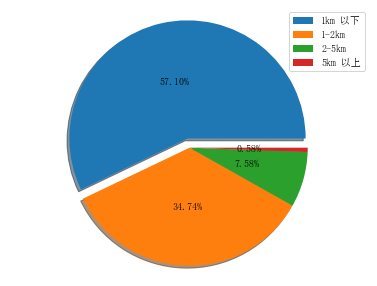

In [4]:
# 3. 画图
plt.figure(figsize=(6.5, 5))
explode = [0.08, 0., 0., 0.]
labels = ["1km 以下", "1-2km", "2-5km", "5km 以上"]
plt.pie(distrib, explode, labels, pctdistance=0.5, autopct="%.2f%%", labeldistance=None, shadow=True)

plt.axis('equal')
plt.legend(loc='upper right')
plt.savefig("distribute.png", dpi=200, bbox_inches='tight')
plt.show()
plt.close()
